## Import Libraries

In [1]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from datetime import datetime
from scipy.stats import zscore

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

## Loading the Data

In [3]:
df = pd.read_excel("marketing_data.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


In [4]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

## Feature Engineering

In [5]:
# Assuming df is your DataFrame
null_income_rows = df[df['Income'].isnull()]
null_income_rows.head(3)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,49,37,53,12,7,2,8,9,0,0
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,0,2,1,1,1,0,2,7,0,0
394,3769,1972,PhD,Together,NaN,1,0,2014-02-03 00:00:00,17,25,...,0,0,3,1,1,0,3,7,0,0


### Replace 'Year_Birth' column with age

In [6]:
current_year = 2024

# Calculate age
df['Age'] = current_year - df['Year_Birth']

# Drop Year_Birth column
df.drop('Year_Birth', axis=1, inplace=True)

# Display the first few rows of the updated dataframe
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,...,189,218,1,4,4,6,1,1,0,54
1,1,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,...,0,37,1,7,3,7,5,1,0,63
2,10476,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,...,2,30,1,3,2,5,2,0,0,66
3,1386,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,0,...,0,0,1,1,0,2,7,0,0,57
4,5371,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,16,...,0,34,2,3,1,2,7,1,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,18,...,48,78,2,5,2,11,4,0,0,48
2236,5263,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,10,...,8,16,1,1,0,3,8,0,0,47
2237,22,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,2,...,5,14,2,6,1,5,8,0,0,48
2238,528,Graduation,Married,65819.0,0,0,11/29/12,99,267,38,...,165,63,1,5,4,10,3,0,0,46


In [7]:
print('Unique Ages:')
print(df['Age'].unique())
print('Total Number of Unique Records')
print(df['Age'].nunique())

Unique Ages:
[ 54  63  66  57  35  70  77  45  65  43  55  47  64  58  48  59  68  49
  53  38  52  50  34  37  40  56  69  41  51  46  72  62  60  42  61  67
  44  79  75  76  71  78  39  32  80  73  36  74  30  31  33 131  28  29
 125  81  83  84 124]
Total Number of Unique Records
59


### Calculating Membership Duration

In [8]:
# Convert 'Dt_Customer' to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%m/%d/%y')

# Get the current year
current_year = datetime.now().year

# Calculate tenure and replace 'Dt_Customer' column
df['Membership_Age'] = current_year - df['Dt_Customer'].dt.year

# Drop the 'Dt_Customer' column
df.drop('Dt_Customer', axis=1, inplace=True)

df.head(3)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age
0,1826,Graduation,Divorced,84835.0,0,0,0,189,104,379,...,218,1,4,4,6,1,1,0,54,10
1,1,Graduation,Single,57091.0,0,0,0,464,5,64,...,37,1,7,3,7,5,1,0,63,10
2,10476,Graduation,Married,67267.0,0,1,0,134,11,59,...,30,1,3,2,5,2,0,0,66,10


### Replace some values under Marital_Status Columns for stadardization

In [9]:
# Replace values
df['Marital_Status'] = df['Marital_Status'].replace({
    'Together': 'Single',
    'YOLO': 'Single',
    'Alone': 'Single',
    'Absurd': 'Single'
})

print(df['Marital_Status'].unique())

['Divorced' 'Single' 'Married' 'Widow']


### Handling null income values

In [10]:
#for null income, dependent on unique education and marital status
income_by_education_marital = df.groupby(['Education', 'Marital_Status'])['Income'].mean()

print(income_by_education_marital)

Education   Marital_Status
2n Cycle    Divorced          49395.130435
            Married           46201.100000
            Single            48233.706522
            Widow             51392.200000
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            19551.781250
            Widow             22123.000000
Graduation  Divorced          54526.042017
            Married           50800.258741
            Single            53714.529081
            Widow             54976.657143
Master      Divorced          50331.945946
            Married           53286.028986
            Single            52830.888268
            Widow             58401.545455
PhD         Divorced          53096.615385
            Married           58138.031579
            Single            54659.218605
            Widow             60288.083333
Name: Income, dtype: float64


In [11]:
print('Sample null valued income: ') 
df[df['ID'] == 3769]

Sample null valued income: 


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age
394,3769,PhD,Single,NaN,1,0,17,25,1,13,...,3,1,1,0,3,7,0,0,52,10


In [12]:
# Calculate the mean income for each education level and marital status
income_by_education_marital = df.groupby(['Education', 'Marital_Status'])['Income'].mean()

# Fill null values in 'Income' column with mean income based on education and marital status
df['Income'] = df.apply(lambda row: income_by_education_marital[row['Education'], row['Marital_Status']] if pd.isnull(row['Income']) else row['Income'], axis=1)

#df
print('After: ') 
df[df['ID'] == 3769]

After: 


,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age
394,3769,PhD,Single,54659.218605,1,0,17,25,1,13,...,3,1,1,0,3,7,0,0,52,10


#### Removal of outliers in income column

In [13]:
print('before removal: ', df.shape)
# Calculate the z-scores for the Income column
df['Income_zscore'] = zscore(df['Income'])

# Define a threshold for z-score
threshold = 3

# Filter out rows where the absolute z-score is greater than the threshold
df = df[abs(df['Income_zscore']) <= threshold]

# Drop the z-score column
df = df.drop(columns=['Income_zscore'])
print('after removal: ', df.shape)

before removal:  (2240, 22)
after removal:  (2232, 22)


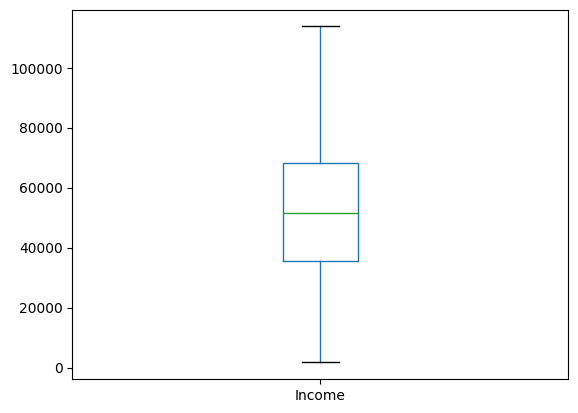

In [14]:
#Outlier Detection Using Boxplot
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(df, "Income")

In [15]:
# Define income thresholds
print(df['Income'].min())
print(df['Income'].max())


1730.0
113734.0


### Products purchased in the last 2 years

In [16]:
# Create a new column with the sum of the specified columns
df['Total_Mnt'] = df[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']].sum(axis=1)

# Drop the individual columns
df = df.drop(['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds'], axis=1)

df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age,Total_Mnt
0,1826,Graduation,Divorced,84835.0,0,0,0,1,4,4,6,1,1,0,54,10,1190
1,1,Graduation,Single,57091.0,0,0,0,1,7,3,7,5,1,0,63,10,577
2,10476,Graduation,Married,67267.0,0,1,0,1,3,2,5,2,0,0,66,10,251
3,1386,Graduation,Single,32474.0,1,1,0,1,1,0,2,7,0,0,57,10,11
4,5371,Graduation,Single,21474.0,1,0,0,2,3,1,2,7,1,0,35,10,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,0,1,99,2,5,2,11,4,0,0,48,11,689
2236,5263,2n Cycle,Married,31056.0,1,0,99,1,1,0,3,8,0,0,47,11,55
2237,22,Graduation,Divorced,46310.0,1,0,99,2,6,1,5,8,0,0,48,12,309
2238,528,Graduation,Married,65819.0,0,0,99,1,5,4,10,3,0,0,46,12,1383


### Total Number of children 

In [17]:
# Create a new column with the sum of the specified columns
df['Num_of_Child'] = df[['Kidhome', 'Teenhome']].sum(axis=1)

# Drop the individual columns
df = df.drop(['Kidhome', 'Teenhome'], axis=1)

df

,ID,Education,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age,Total_Mnt,Num_of_Child
0,1826,Graduation,Divorced,84835.0,0,1,4,4,6,1,1,0,54,10,1190,0
1,1,Graduation,Single,57091.0,0,1,7,3,7,5,1,0,63,10,577,0
2,10476,Graduation,Married,67267.0,0,1,3,2,5,2,0,0,66,10,251,1
3,1386,Graduation,Single,32474.0,0,1,1,0,2,7,0,0,57,10,11,2
4,5371,Graduation,Single,21474.0,0,2,3,1,2,7,1,0,35,10,91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,PhD,Divorced,66476.0,99,2,5,2,11,4,0,0,48,11,689,1
2236,5263,2n Cycle,Married,31056.0,99,1,1,0,3,8,0,0,47,11,55,1
2237,22,Graduation,Divorced,46310.0,99,2,6,1,5,8,0,0,48,12,309,1
2238,528,Graduation,Married,65819.0,99,1,5,4,10,3,0,0,46,12,1383,0


### Conversion of categorical features using One-Hot Encode

#### Education

In [18]:
def one_hot_encode(df, column):
    encoded = pd.get_dummies(df[column], drop_first= True, prefix='Education')
    df = df.drop(column, axis = 1)
    df = df.join(encoded)
    return df

df = one_hot_encode(df, 'Education')
df.head(3)

,ID,Marital_Status,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age,Total_Mnt,Num_of_Child,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1826,Divorced,84835.0,0,1,4,4,6,1,1,0,54,10,1190,0,False,True,False,False
1,1,Single,57091.0,0,1,7,3,7,5,1,0,63,10,577,0,False,True,False,False
2,10476,Married,67267.0,0,1,3,2,5,2,0,0,66,10,251,1,False,True,False,False


#### Marital Status

In [19]:
def one_hot_encode(df, column):
    encoded = pd.get_dummies(df[column], drop_first= True, prefix='Marital_Status')
    df = df.drop(column, axis = 1)
    df = df.join(encoded)
    return df

df = one_hot_encode(df, 'Marital_Status')
df.head(5)

,ID,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,...,Membership_Age,Total_Mnt,Num_of_Child,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,1826,84835.0,0,1,4,4,6,1,1,0,...,10,1190,0,False,True,False,False,False,False,False
1,1,57091.0,0,1,7,3,7,5,1,0,...,10,577,0,False,True,False,False,False,True,False
2,10476,67267.0,0,1,3,2,5,2,0,0,...,10,251,1,False,True,False,False,True,False,False
3,1386,32474.0,0,1,1,0,2,7,0,0,...,10,11,2,False,True,False,False,False,True,False
4,5371,21474.0,0,2,3,1,2,7,1,0,...,10,91,1,False,True,False,False,False,True,False


In [20]:
#print all columns
column_names = df.columns
print(column_names)

Index(['ID', 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain', 'Age', 'Membership_Age', 'Total_Mnt',
       'Num_of_Child', 'Education_Basic', 'Education_Graduation',
       'Education_Master', 'Education_PhD', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widow'],
      dtype='object')


In [21]:
df = df.drop('ID', axis=1)

In [22]:
df

,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Membership_Age,Total_Mnt,Num_of_Child,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Married,Marital_Status_Single,Marital_Status_Widow
0,84835.0,0,1,4,4,6,1,1,0,54,10,1190,0,False,True,False,False,False,False,False
1,57091.0,0,1,7,3,7,5,1,0,63,10,577,0,False,True,False,False,False,True,False
2,67267.0,0,1,3,2,5,2,0,0,66,10,251,1,False,True,False,False,True,False,False
3,32474.0,0,1,1,0,2,7,0,0,57,10,11,2,False,True,False,False,False,True,False
4,21474.0,0,2,3,1,2,7,1,0,35,10,91,1,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,66476.0,99,2,5,2,11,4,0,0,48,11,689,1,False,False,False,True,False,False,False
2236,31056.0,99,1,1,0,3,8,0,0,47,11,55,1,False,False,False,False,True,False,False
2237,46310.0,99,2,6,1,5,8,0,0,48,12,309,1,False,True,False,False,False,False,False
2238,65819.0,99,1,5,4,10,3,0,0,46,12,1383,0,False,True,False,False,True,False,False


## Modelling

In [23]:
X = df.drop('Response', axis=1)[[ 'Income', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
                                  'Complain', 'Age', 'Membership_Age', 'Total_Mnt', 'Num_of_Child', 'Education_Basic', 'Education_Graduation',
                                 'Education_Master', 'Education_PhD', 'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Widow' ]]
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Logistic Regression

In [25]:
# clf = LogisticRegression(random_state=0).fit(X_train, y_train)
# preds = clf.predict(scaler.transform(X_test))
# Define the hyperparameters grid for logistic regression


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],               # Penalty norm
    'solver': ['liblinear'],               # Solver for optimization problem
    'max_iter': [100, 200, 300]            # Maximum number of iterations
}

# Initialize logistic regression classifier
log_reg = LogisticRegression(random_state=0)

# Initialize GridSearchCV with logistic regression classifier and hyperparameters grid
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best estimator
best_clf = grid_search.best_estimator_

# Make predictions on the test data using the best estimator
preds = best_clf.predict(scaler.transform(X_test))

# Initialize logistic regression classifier with best hyperparameters
best_clf = LogisticRegression(C=0.001, max_iter=100, penalty='l2', solver='liblinear', random_state=0)

# Fit the model on the training data
best_clf.fit(X_train, y_train)

# Make predictions on the test data
#preds = best_clf.predict(scaler.transform(X_test))


Best hyperparameters: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.001, random_state=0, solver='liblinear')

In [26]:
acc = accuracy_score(y_test, preds)
prec = precision_score(y_test, preds)
rec = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
auc = roc_auc_score(y_test, preds)

print("Accuracy: %.4f" % acc)
print("Precision: %.4f" % prec)
print("Recall: %.4f" % rec)
print("F1: %.4f" % f1)
print("AUC: %.4f" % auc)

Accuracy: 0.8612
Precision: 0.5897
Recall: 0.2300
F1: 0.3309
AUC: 0.6010
